# Lid-Driven Cavity

This problem involves fluid in a rectangular cavity with uniform velocity at the top.

In [1]:
## Import libraries
global np
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import cm

## Import functions
from solvers import solve_cavity

## Problem setup

### Physical definition

In [2]:
xmin = 0
xmax = 1
ymin = 0
ymax = 1

print("Horizontal boundaries: "+str(xmin)+", "+str(xmax))
print("Vertical boundaries: "+str(ymin)+", "+str(ymax))

Horizontal boundaries: 0, 1
Vertical boundaries: 0, 1


### Discretization

In [3]:
nx = 41
ny = 41

print("Number of horizontal grid points = "+str(nx))
print("Number of vertical grid points = "+str(ny))

Number of horizontal grid points = 41
Number of vertical grid points = 41


dx=0.025
dy=0.025
Total number of cells = 1600


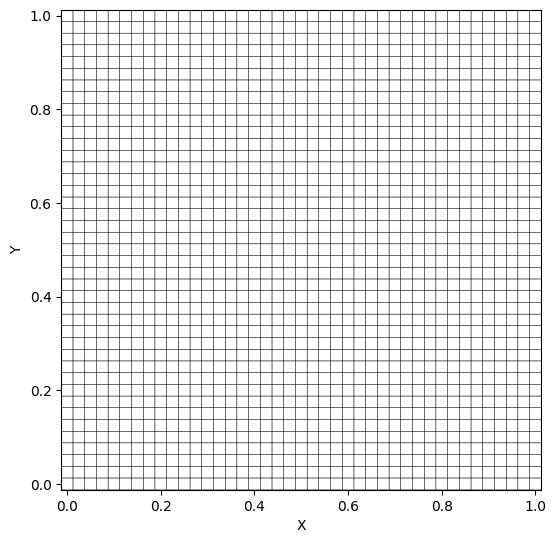

In [4]:
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)

x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)
X,Y = np.meshgrid(x,y)

fig = plt.figure(dpi=100)
ax = fig.add_axes([0, 0, 1, 1],aspect='equal')
ax.pcolor(X, Y, np.ones_like(Y), facecolor='none', edgecolor='k')

plt.xlabel('X');
plt.ylabel('Y');

count = (nx-1)*(ny-1)

print(f"dx={dx}")
print(f"dy={dy}")
print("Total number of cells = "+str(count))

### Time

In [11]:
#number of timesteps
n_time = 10000
dt = 0.0001
total_time = n_time*dt

print("Total flow time: "+str(total_time)+" seconds")

#number of iteration per timestep
nit = 20

#save data every n_save timesteps
n_save = 100

Total flow time: 1.0 seconds


## Fluid properties

In [12]:
rho = 1   #density
nu = 0.1  #kinematic viscosity

u_lid = 10 #lid velocity

print("Lid velocity = "+str(u_lid)+" m/s")
print("Density = "+str(rho)+" kg/m3")
print("Viscosity = "+str(nu)+" kg/ms")

Lid velocity = 10 m/s
Density = 1 kg/m3
Viscosity = 0.1 kg/ms


## Initialization

In [13]:
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))

print("Solver initialized.")

Solver initialized.


## Calculation

In [16]:
%%capture

run = True
print("Beginning calculation...")

for n in range(n_time):
    if run:
        u,v,vel,p,run = solve_cavity(u_lid,u,v,dt,dx,dy,p,rho,nu,nx,ny,nit)
    else:
        print(f"Returning solution at t={n*dt:.3}...")
        print("Calculation failed.")
        break
    
    ## The code below just plots the intermediate result and saves it as a jpeg
    ## It is probably more appropriate to save the raw solution data instead
    ## But I wanted this code to be "lightweight" in terms of libraries i.e. avoid pandas
    ## To-do... maybe I write a csv reader to package with this code
    if n%n_save == 0:
        
        fig = plt.figure(figsize=(8,6),dpi=300)
        ax = fig.add_axes([0, 0.05, 1, 0.9],aspect='equal')
        
        levels = np.linspace(0,u_lid,11)
        ticks = np.linspace(0,u_lid,11)

        plt.contourf(X,Y,vel,cmap='Spectral_r',levels=levels,extend='both')
        plt.colorbar(ticks=ticks)

        plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2])
        
        plt.xlabel('X')
        plt.ylabel('Y')
        
        plt.title(str(count)+' cells, $u_{lid}$='+str(u_lid)+'m/s');
        plt.savefig('result/result_'+str(n)+'.png')
        plt.clf()
        plt.close()
        plt.close(fig)

if run:
    print("Calculation complete")

In [ ]:
writer = animation.PillowWriter(fps=10)
n_frames = np.linspace(0,n_time-n_save,int(n_time/n_save))

out = plt.figure(figsize=(8,6),dpi=300)
out.add_axes([0, 0, 1, 1])

def animate(i):
    im = plt.imread('result/result_'+str(int(n_frames[i]))+'.png')
    plt.imshow(im)
    
plt.axis('off')
plt.rcParams['savefig.bbox'] = 'tight'

anim = animation.FuncAnimation(out, animate, frames=len(n_frames), interval=1)
anim.save('output.gif', writer=writer)